<a href="https://colab.research.google.com/github/prahladpunia/AI/blob/main/NAIVE_BAYES_CLASSIFIER_SPAM_DETECTION_Feb_27_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CODE TO DETECT SPAM E-MAILS USING NAIVE BAYES

#PROBLEM STATEMENT     
The SMS Spam Collection is a set of SMS tagged messages that have been     collected for SMS Spam research. It contains one set of SMS messages in     English   of 5,574 messages, tagged acording being ham (legitimate) or spam.     

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

STEP #1: IMPORT DATASET

In [2]:
spam_df=pd.read_csv("emails.csv")

In [3]:
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


STEP #2: VISUALIZE DATASET

In [6]:
# Let's get the length of the messages
spam_df['length'] = spam_df['text'].apply(len)
spam_df.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [11]:
spam_df["length"].describe()

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: length, dtype: float64

In [12]:
# Let's see which message is the most popular ham/spam message
spam_df.groupby('spam').describe()

length                                                                  
       count         mean          std   min     25%     50%      75%      max
spam                                                                          
0     4360.0  1631.918119  1959.664549  13.0  577.75  1122.0  2037.25  43952.0
1     1368.0  1317.257310  2271.372893  18.0  401.50   693.5  1250.25  28432.0

In [13]:
spam=spam_df[spam_df["spam"]==1]

In [14]:
spam

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1,347
1364,Subject: would you like a $ 250 gas card ? do...,1,188
1365,"Subject: immediate reply needed dear sir , i...",1,3164
1366,Subject: wanna see me get fisted ? fist bang...,1,734


In [15]:
ham = spam_df[spam_df["spam"]==0]

In [16]:
ham

,text,spam,length
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997
1370,Subject: from the enron india newsdesk - jan 1...,0,7902
1371,Subject: re : powerisk 2001 - your invitation ...,0,3644
1372,Subject: re : resco database and customer capt...,0,5535
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


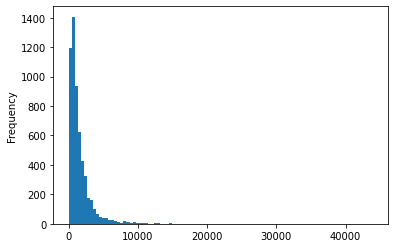

In [17]:
spam_df['length'].plot(bins=100, kind='hist') 

In [18]:
print("Spam email Percentage :", len(spam)/len(spam_df)*100, "%")

Spam email Percentage : 23.88268156424581 %


In [19]:
print("Ham email Percentage :", len(ham)/len(spam_df)*100, "%")

Ham email Percentage : 76.11731843575419 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


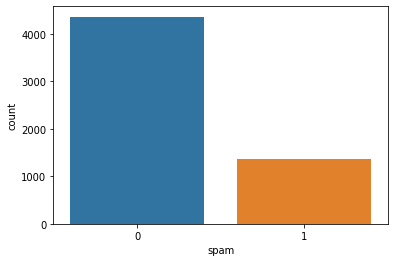

In [20]:
sns.countplot(spam_df["spam"], label="COUNT")


In [21]:
spam_df.length.describe()

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: length, dtype: float64

In [22]:
# Let's see the longest message 43952
spam_df[spam_df['length'] == 43952]['text'].iloc[0]

'Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under \' protest \' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl 

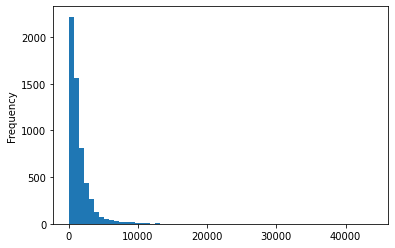

In [23]:
spam_df['length'].plot(bins=60, kind='hist') 

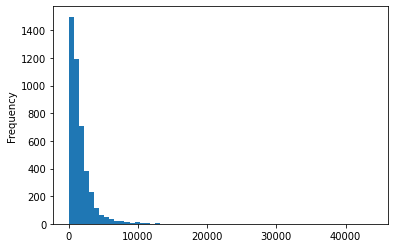

In [24]:
ham['length'].plot(bins=60, kind='hist') 

STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

COUNT VECTORIZER EXAMPLE

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document first and first?']

sample_vectorizer=CountVectorizer()
X=sample_vectorizer.fit_transform(sample_data)

In [28]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [1 1 3 1 0 0 1 0 1]]


In [29]:
print(sample_vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#LET'S APPLY THE PREVIOUS THREE PROCESSES TO OUR SPAM/HAM EXAMPLE

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df["text"])

In [32]:
print(vectorizer.get_feature_names())

['00', '000', '0000', '000000', '00000000', '0000000000', '000000000003619', '000000000003991', '000000000003997', '000000000005168', '000000000005409', '000000000005411', '000000000005412', '000000000005413', '000000000005820', '000000000006238', '000000000006452', '000000000007494', '000000000007498', '000000000007876', '000000000010552', '000000000011185', '000000000012677', '000000000012734', '000000000012735', '000000000012736', '000000000012738', '000000000012741', '000000000012987', '000000000013085', '000000000013287', '000000000015384', '000000000015793', '000000000023619', '000000000024099', '000000000025307', '000000000025312', '000010220', '0000102317', '0000102374', '0000102789', '0000104281', '0000104282', '0000104486', '0000104631', '0000104730', '0000104776', '0000104778', '0000107043', '0000108729', '000066', '0001', '000166', '0002', '000202', '0003', '0004', '0005', '0006', '00076', '0009249480', '0009249481', '0009249504', '0009249505', '0009249506', '001', '0011', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
spamham_countvectorizer.shape

(5728, 37303)

#STEP4 - TRAINING THE MODEL

In [36]:
label = spam_df['spam'].values

In [37]:
label

array([1, 1, 1, ..., 0, 0, 0])

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB()

In [43]:
testing_sample = ['Free Money!!!','Hi Kim need further info please call me',"Lottery windfall"]
testing_sample_countvectrizer = vectorizer.transform(testing_sample)

In [44]:
test_predict = NB_classifier.predict(testing_sample_countvectrizer)
test_predict

array([1, 0, 1])

In [50]:
testing_sample2=["hello I am Riyan, I will like to Book Hotel in Bangkok", "money, viagra!!!"]

In [51]:
testing_sample_countvectrizer2= vectorizer.transform(testing_sample2)

In [52]:
NB_classifier.predict(testing_sample_countvectrizer2)

array([0, 1])

#STEP#4: DIVIDE THE DATA INTO TRAINING AND TESTING PRIOR TO TRAINING

In [53]:
X= spamham_countvectorizer
y=label

In [54]:
X.shape, y.shape

((5728, 37303), (5728,))

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [58]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

#STEP 5 - Evaluating the Model

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([0, 1, 0, ..., 0, 1, 0])

In [61]:
cm = confusion_matrix(y_train, y_predict_train)

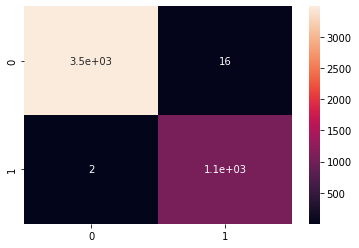

In [62]:
sns.heatmap(cm, annot=True)

In [63]:
y_predict_test=NB_classifier.predict(X_test)
y_predict_test

array([0, 1, 0, ..., 0, 0, 0])

In [64]:
cm_test = confusion_matrix(y_test, y_predict_test)

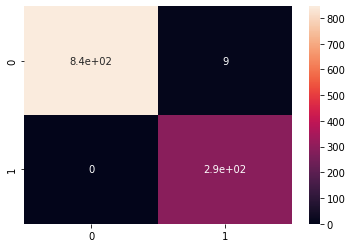

In [66]:
sns.heatmap(cm_test, annot=True)

In [67]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       854
           1       0.97      1.00      0.98       292

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

